In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import urllib
from api_keys import api_key
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

api_key

'79cdada48157c28822f55a19d54674d6'

## Generate Cities List

In [18]:
lat_lngs = []
cities = []

# generate random lat/lon combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # ensure unique city
    if city not in cities:
        cities.append(city)


len(cities)
print(cities)

['taolanaro', 'tabiauea', 'albany', 'volchansk', 'hilo', 'hobart', 'kapaa', 'kavieng', 'punta arenas', 'constitucion', 'peniche', 'ust-omchug', 'nikolskoye', 'rikitea', 'vaitupu', 'oranjemund', 'ushuaia', 'dikson', 'cape town', 'illoqqortoormiut', 'raga', 'santiago', 'aklavik', 'leh', 'samusu', 'ponta do sol', 'bluff', 'ritchie', 'puerto ayora', 'barrow', 'airai', 'mar del plata', 'east london', 'la ronge', 'tagusao', 'chapais', 'alofi', 'bilma', 'severo-kurilsk', 'sandwick', 'uribia', 'busselton', 'tuktoyaktuk', 'roebourne', 'palu', 'belushya guba', 'mataura', 'avarua', 'ilulissat', 'ribeira grande', 'longyearbyen', 'norman wells', 'hirara', 'port elizabeth', 'faanui', 'carnarvon', 'falun', 'saldanha', 'goderich', 'mehamn', 'mahebourg', 'sorland', 'kaduqli', 'khatanga', 'qaanaaq', 'iqaluit', 'the valley', 'bedesa', 'kunya', 'hithadhoo', 'port alfred', 'santa cruz cabralia', 'cherskiy', 'rockingham', 'lorengau', 'praya', 'wichita falls', 'coahuayana', 'vardo', 'marsh harbour', 'jardim'

## Perform API Calls

In [22]:
# First step in creating API url
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# create initial list to store desired data from JSON
city_data = []


record_count = 1
set_count = 1


# Loop through all the cities in list       
  
for i, city in enumerate(cities):
    
    # incrementing 'set count' by 1 each time 'record count' reaches 50, resetting 'record count' to 1 using modulus
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city
    city_url = url + "&q=" + urllib.request.pathname2url(city)

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    print(city_url)

    # Incrementing record count per city
    record_count += 1

    # Run API request for each of the cities
    try:
       
        # Retrieve data from JSON
        city_weather = requests.get(city_url).json()

        # creat variable for each city based on JSON values
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append city_data list with values from JSON using variable created
        city_data.append({"City": city, 
                          "Latitude": city_lat, 
                          "Longitude": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # ERROR SKIPPING
    except:
        print('Error with' + str(city))
        continue

              
        
print("-----------------------------")
print("Data Retrieval Complete      ")

        
        

Processing Record 1 of Set 1 | taolanaro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=79cdada48157c28822f55a19d54674d6&q=taolanaro
Error withtaolanaro
Processing Record 2 of Set 1 | tabiauea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=79cdada48157c28822f55a19d54674d6&q=tabiauea
Error withtabiauea
Processing Record 3 of Set 1 | albany
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=79cdada48157c28822f55a19d54674d6&q=albany
Processing Record 4 of Set 1 | volchansk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=79cdada48157c28822f55a19d54674d6&q=volchansk
Processing Record 5 of Set 1 | hilo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=79cdada48157c28822f55a19d54674d6&q=hilo
Processing Record 6 of Set 1 | hobart
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=79cdada48157c28822f55a19d54674d6&q=hobart
Processing Record 7 of Set 1 | kapaa
http://api.openweatherma

Processing Record 4 of Set 2 | port elizabeth
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=79cdada48157c28822f55a19d54674d6&q=port%20elizabeth
Processing Record 5 of Set 2 | faanui
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=79cdada48157c28822f55a19d54674d6&q=faanui
Processing Record 6 of Set 2 | carnarvon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=79cdada48157c28822f55a19d54674d6&q=carnarvon
Processing Record 7 of Set 2 | falun
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=79cdada48157c28822f55a19d54674d6&q=falun
Processing Record 8 of Set 2 | saldanha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=79cdada48157c28822f55a19d54674d6&q=saldanha
Processing Record 9 of Set 2 | goderich
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=79cdada48157c28822f55a19d54674d6&q=goderich
Processing Record 10 of Set 2 | mehamn
http://api.openweathermap.org/data/2.5/weat

Error withattawapiskat
Processing Record 8 of Set 3 | yellowknife
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=79cdada48157c28822f55a19d54674d6&q=yellowknife
Processing Record 9 of Set 3 | gusau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=79cdada48157c28822f55a19d54674d6&q=gusau
Processing Record 10 of Set 3 | kajaani
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=79cdada48157c28822f55a19d54674d6&q=kajaani
Processing Record 11 of Set 3 | ostersund
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=79cdada48157c28822f55a19d54674d6&q=ostersund
Processing Record 12 of Set 3 | ust-kulom
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=79cdada48157c28822f55a19d54674d6&q=ust-kulom
Processing Record 13 of Set 3 | deep river
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=79cdada48157c28822f55a19d54674d6&q=deep%20river
Processing Record 14 of Set 3 | lata
http://api.openw

Processing Record 11 of Set 4 | saint george
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=79cdada48157c28822f55a19d54674d6&q=saint%20george
Processing Record 12 of Set 4 | grindavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=79cdada48157c28822f55a19d54674d6&q=grindavik
Processing Record 13 of Set 4 | saint-philippe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=79cdada48157c28822f55a19d54674d6&q=saint-philippe
Processing Record 14 of Set 4 | acarau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=79cdada48157c28822f55a19d54674d6&q=acarau
Error withacarau
Processing Record 15 of Set 4 | palasa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=79cdada48157c28822f55a19d54674d6&q=palasa
Error withpalasa
Processing Record 16 of Set 4 | hermanus
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=79cdada48157c28822f55a19d54674d6&q=hermanus
Processing Record 17 of Set 4 | 

Processing Record 14 of Set 5 | mount pleasant
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=79cdada48157c28822f55a19d54674d6&q=mount%20pleasant
Processing Record 15 of Set 5 | kruisfontein
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=79cdada48157c28822f55a19d54674d6&q=kruisfontein
Processing Record 16 of Set 5 | port lincoln
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=79cdada48157c28822f55a19d54674d6&q=port%20lincoln
Processing Record 17 of Set 5 | souillac
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=79cdada48157c28822f55a19d54674d6&q=souillac
Processing Record 18 of Set 5 | pontianak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=79cdada48157c28822f55a19d54674d6&q=pontianak
Processing Record 19 of Set 5 | torbay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=79cdada48157c28822f55a19d54674d6&q=torbay
Processing Record 20 of Set 5 | mount isa
http://api

Processing Record 18 of Set 6 | cap-aux-meules
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=79cdada48157c28822f55a19d54674d6&q=cap-aux-meules
Processing Record 19 of Set 6 | college
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=79cdada48157c28822f55a19d54674d6&q=college
Processing Record 20 of Set 6 | archidona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=79cdada48157c28822f55a19d54674d6&q=archidona
Processing Record 21 of Set 6 | bakchar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=79cdada48157c28822f55a19d54674d6&q=bakchar
Processing Record 22 of Set 6 | la romana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=79cdada48157c28822f55a19d54674d6&q=la%20romana
Processing Record 23 of Set 6 | wamba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=79cdada48157c28822f55a19d54674d6&q=wamba
Processing Record 24 of Set 6 | arnstadt
http://api.openweathermap.org/dat

Processing Record 21 of Set 7 | bathurst
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=79cdada48157c28822f55a19d54674d6&q=bathurst
Processing Record 22 of Set 7 | owando
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=79cdada48157c28822f55a19d54674d6&q=owando
Processing Record 23 of Set 7 | sofiysk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=79cdada48157c28822f55a19d54674d6&q=sofiysk
Error withsofiysk
Processing Record 24 of Set 7 | chicama
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=79cdada48157c28822f55a19d54674d6&q=chicama
Processing Record 25 of Set 7 | pundaguitan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=79cdada48157c28822f55a19d54674d6&q=pundaguitan
Processing Record 26 of Set 7 | qaqortoq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=79cdada48157c28822f55a19d54674d6&q=qaqortoq
Processing Record 27 of Set 7 | ola
http://api.openweathermap.org/

Processing Record 25 of Set 8 | dwarka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=79cdada48157c28822f55a19d54674d6&q=dwarka
Processing Record 26 of Set 8 | zaragoza
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=79cdada48157c28822f55a19d54674d6&q=zaragoza
Processing Record 27 of Set 8 | hamilton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=79cdada48157c28822f55a19d54674d6&q=hamilton
Processing Record 28 of Set 8 | tezu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=79cdada48157c28822f55a19d54674d6&q=tezu
Processing Record 29 of Set 8 | linchuan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=79cdada48157c28822f55a19d54674d6&q=linchuan
Error withlinchuan
Processing Record 30 of Set 8 | kailua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=79cdada48157c28822f55a19d54674d6&q=kailua
Processing Record 31 of Set 8 | port augusta
http://api.openweathermap.org/data

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=79cdada48157c28822f55a19d54674d6&q=pemberton
Processing Record 31 of Set 9 | isangel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=79cdada48157c28822f55a19d54674d6&q=isangel
Processing Record 32 of Set 9 | emerald
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=79cdada48157c28822f55a19d54674d6&q=emerald
Processing Record 33 of Set 9 | qazvin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=79cdada48157c28822f55a19d54674d6&q=qazvin
Processing Record 34 of Set 9 | aksarka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=79cdada48157c28822f55a19d54674d6&q=aksarka
Processing Record 35 of Set 9 | carutapera
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=79cdada48157c28822f55a19d54674d6&q=carutapera
Processing Record 36 of Set 9 | sumbe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=79cdada48157c28822f55a

Processing Record 35 of Set 10 | sao miguel do araguaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=79cdada48157c28822f55a19d54674d6&q=sao%20miguel%20do%20araguaia
Processing Record 36 of Set 10 | verkhnevilyuysk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=79cdada48157c28822f55a19d54674d6&q=verkhnevilyuysk
Processing Record 37 of Set 10 | fuerte olimpo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=79cdada48157c28822f55a19d54674d6&q=fuerte%20olimpo
Processing Record 38 of Set 10 | trelew
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=79cdada48157c28822f55a19d54674d6&q=trelew
Processing Record 39 of Set 10 | nosy varika
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=79cdada48157c28822f55a19d54674d6&q=nosy%20varika
Processing Record 40 of Set 10 | nuuk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=79cdada48157c28822f55a19d54674d6&q=nuuk
Processing Record 41

Processing Record 38 of Set 11 | dolbeau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=79cdada48157c28822f55a19d54674d6&q=dolbeau
Error withdolbeau
Processing Record 39 of Set 11 | usinsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=79cdada48157c28822f55a19d54674d6&q=usinsk
Processing Record 40 of Set 11 | pishin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=79cdada48157c28822f55a19d54674d6&q=pishin
Processing Record 41 of Set 11 | lasa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=79cdada48157c28822f55a19d54674d6&q=lasa
Processing Record 42 of Set 11 | kalmar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=79cdada48157c28822f55a19d54674d6&q=kalmar
Processing Record 43 of Set 11 | sechura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=79cdada48157c28822f55a19d54674d6&q=sechura
Processing Record 44 of Set 11 | zhangjiakou
http://api.openweathermap.org/data/2.

In [23]:
# Create Data Frame
city_data_df= pd.DataFrame(city_data)

# Name colmns in data fram using variable created
max_temp= city_data_df['Max Temp']
humidity= city_data_df['Humidity']
wind_speed= city_data_df['Wind Speed']
cloudiness= city_data_df['Cloudiness']
latitude= city_data_df['Latitude']

city_data_df.to_csv(output_data_file, index_label="City ID")


city_data_df

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,albany,40,US,1531529640,41,42.65,-73.75,80.60,2.64
1,volchansk,12,RU,1531530853,92,59.94,60.08,58.92,4.76
2,hilo,90,US,1531528740,74,19.71,-155.08,82.40,10.29
3,hobart,40,AU,1531530000,81,-42.88,147.33,46.40,10.29
4,kapaa,75,US,1531526160,74,22.08,-159.32,84.20,16.11
5,kavieng,68,PG,1531530854,100,-2.57,150.80,78.63,0.63
6,punta arenas,0,CL,1531526400,99,-53.16,-70.91,32.00,13.87
7,constitucion,75,MX,1531525680,20,23.99,-104.67,82.40,12.75
8,peniche,40,PT,1531528200,88,39.36,-9.38,64.40,4.70
9,ust-omchug,80,RU,1531530854,59,61.13,149.63,65.22,4.21


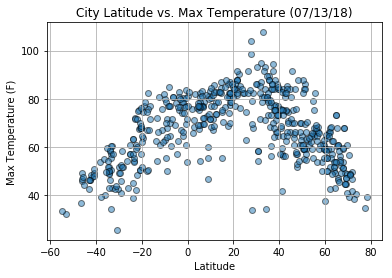

In [29]:
plt.scatter(latitude, max_temp,
            edgecolor='black', linewidths=1, marker='o', alpha=0.5)

plt.title('City Latitude vs. Max Temperature (%s)' % time.strftime('%x'))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

plt.savefig('output_data/Fig1.png')
plt.show()

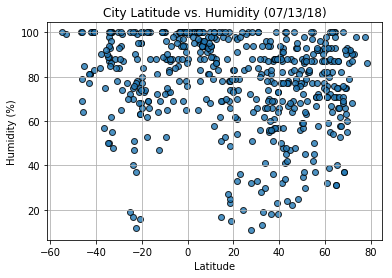

In [30]:
plt.scatter(latitude, humidity,
            edgecolor='black', linewidths=1, marker='o', alpha=0.8)

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (%s)' % time.strftime('%x'))
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

plt.savefig('output_data/Fig2.png')
plt.show()

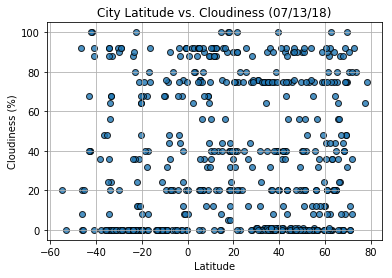

In [31]:
plt.scatter(latitude, cloudiness,
            edgecolor='black', linewidths=1, marker='o', alpha=0.8)

plt.title('City Latitude vs. Cloudiness (%s)' % time.strftime('%x'))
plt.ylabel("Cloudiness (%)")
plt.xlabel('Latitude')
plt.grid(True)

plt.savefig('output_data/Fig3.png')
plt.show()

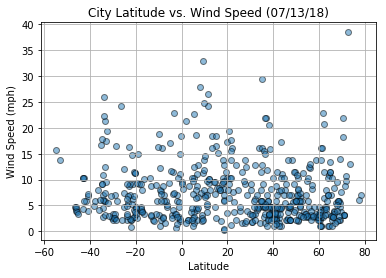

In [32]:
plt.scatter(latitude, wind_speed,
            edgecolor='black', linewidths=1, marker='o', alpha=0.5)

plt.title('City Latitude vs. Wind Speed (%s)' % time.strftime('%x'))
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)


plt.savefig('output_data/Fig4.png')
plt.show()

In [ ]:
city_data_pd.to_csv(output_data_file, index_label= 'City ID')